In [1]:
%matplotlib inline
from scipy.optimize import minimize
import numpy as np
import traml
import copy

In [2]:
def fun(x, stack, layers, c, delta, TR):
    for i in layers:
          
        
        stack.d(i, x[i-1])
    #stack.d(1,x[0])
    #stack.d(2,x[1])
    for p in x:
        p = np.sqrt(x[0]**2)
    x[0]=np.sqrt(x[0]**2)
    min = 1-stack.average(TR, c, delta)
    #min = stack.average(TR, c, delta)
    #print min

    return min**10

In [3]:
def minTR(stack, film_range, c, delta, TR='R'):
    print film_range
    x = []
    layers = []
    bnds = []
    for i in range(film_range[0],film_range[1]+1):
        #print i
        x.append(stack.config[i][1])
        layers.append(i)
        bnds.append((5,100))
        
    result = minimize(fun, x, args=(stack, layers, c,delta, TR), bounds = bnds,tol=1e-30, method='SLSQP')
    
    #stack.plot()
    print layers
    return result

In [4]:
c = traml.Stack()

peak = 0.6
delta = 0.2
mat2 = 105401 #MgF2
sio2 = 111407 #SiO2
zns = 114801 #ZnS
zno = 112003 #ZnO
mgo = 110902 #MgO
#mat1 = 110104 #Al2O3
zro2 = 112101

stack_list = []


c.add(zno,500)
R=[]
R = [c.average('R', peak,delta)]
n = [0]
it = [1]
stack_list.append(copy.deepcopy(c))


c.remove()


for i in range(0, 10):
    if i % 2 == 0:
        print 'even', i
        c.add(zns,20)
    else:
        c.add(sio2,20)
        
    c.add(zno, 500)
    
    result = minTR(c, [1,len(c.config)-2], peak, delta, TR='T')
    R.append(c.average('R',peak,delta))
    n.append(i+1)
    it.append(result.nit)
    stack_list.append(copy.deepcopy(c))
   
    #c.table()
    print '============================================================================================'
    print c.average('R',peak,delta)
    c.remove()
    print '============================================================================================'
    
 

even 0
[1, 1]
[1]
0.132948857581
[1, 2]
[1, 2]
0.0715747748773
even 2
[1, 3]
[1, 2, 3]
0.0713368902409
[1, 4]
[1, 2, 3, 4]
0.0701350413041
even 4
[1, 5]
[1, 2, 3, 4, 5]
0.0699894008977
[1, 6]
[1, 2, 3, 4, 5, 6]
0.0700892100048
even 6
[1, 7]
[1, 2, 3, 4, 5, 6, 7]
0.0595372593319
[1, 8]
[1, 2, 3, 4, 5, 6, 7, 8]
0.0599003983974
even 8
[1, 9]
[1, 2, 3, 4, 5, 6, 7, 8, 9]
0.0589088434305
[1, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
0.0605644562496


In [5]:
c.table()

|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
|   1 |     114801 | 5.0              | passive   |
|   2 |     111407 | 80.9221324777    | passive   |
|   3 |     114801 | 24.9498488007    | passive   |
|   4 |     111407 | 14.7401554554    | passive   |
|   5 |     114801 | 13.6755926888    | passive   |
|   6 |     111407 | 15.3281303274    | passive   |
|   7 |     114801 | 21.978886794     | passive   |
|   8 |     111407 | 17.6240693436    | passive   |
|   9 |     114801 | 13.4212127838    | passive   |
|  10 |     111407 | 15.4316253784    | passive   |


In [6]:
import matplotlib.pyplot as plt

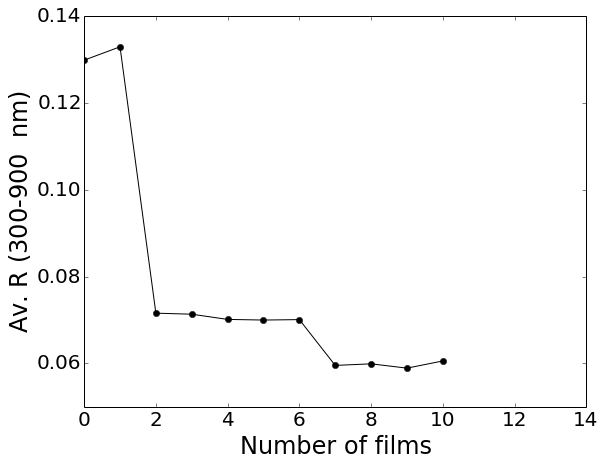

In [7]:
%matplotlib inline
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111)

ax.plot(R, 'o-', color='black')
ax.set_xlim([0,14])
ax.set_xlabel(r'Number of films', fontsize=24)
ax.set_ylabel(r'Av. R ($300 - 900$  nm)', fontsize=24)
ax.tick_params(labelsize = 20)


In [8]:
a = traml.Stack()
a.add(zno, 500)

In [9]:
c.add(zno, 500)

/usr/lib/python2.7/dist-packages/numpy/core/numeric.py:460: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(0.35, 0.9)

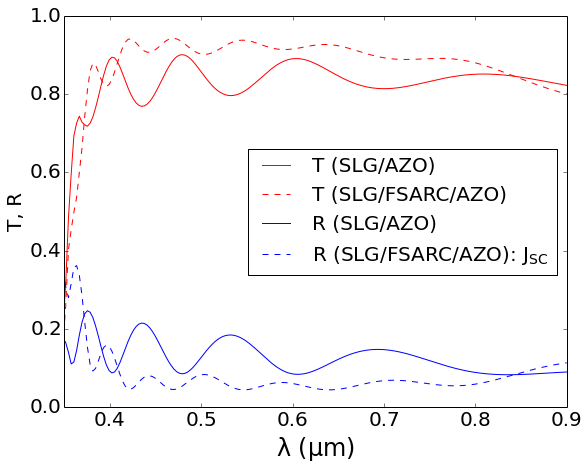

In [10]:
%matplotlib inline

fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111)

l1, = ax.plot(a.x, a.get_T(), '-', color='red', label='T (SLG/AZO)')
l2, = ax.plot(c.x, c.get_T(), '--', color='red', label='T (SLG/FSARC/AZO)')
l3, = ax.plot(a.x, a.get_R(), '-', color='blue', label='R (SLG/AZO)')
l4, = ax.plot(c.x, c.get_R(), '--', color='blue', label='R (SLG/FSARC/AZO): $J_{SC}$')

legend = ax.legend(loc='center right', fontsize=20)

#ax.set_xlim([0,14])
#ax.set_xlabel(r'Number of films', fontsize=20)
ax.set_ylabel('T, R', fontsize=20)
ax.set_xlabel('$\lambda$ ($\mu$m)', fontsize=24)
ax.tick_params(labelsize = 20)
ax.set_ylim([0,1])
ax.set_xlim([0.35,0.9])

#plt.plot(a.x, a.get_T(),)
#plt.plot(c.x, c.get_T())
#a.average('R', 0.6,0.3)
#plt.xlim([0.4, 0.9])

In [11]:
stack_list[9].config

[[301005, '--', 'substrate'],
 [114801, 5.0, 'passive', (0, 10000)],
 [111407, 78.771060289937566, 'passive', (0, 10000)],
 [114801, 23.061108022159402, 'passive', (0, 10000)],
 [111407, 16.451545865056442, 'passive', (0, 10000)],
 [114801, 13.166251962843198, 'passive', (0, 10000)],
 [111407, 14.254024581187201, 'passive', (0, 10000)],
 [114801, 24.754854157573234, 'passive', (0, 10000)],
 [111407, 18.204723453606391, 'passive', (0, 10000)],
 [114801, 9.3884994452959472, 'passive', (0, 10000)],
 [112003, 500, 'passive', (0, 10000)]]

In [12]:
c.library.search('zro2')

|     ID | SHELF   | BOOK      | PAGE   | DESCRIPTION                    |
|--------+---------+-----------+--------+--------------------------------|
| 112101 | main    | ZrO2      | Wood   | Wood and Nassau 1982: Cubic zi |
| 401101 | other   | ZrO2-Y2O3 | Wood   | Wood and Nassau 1982: 12 mol % |


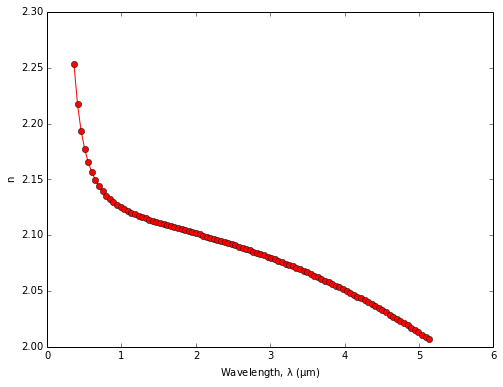

In [13]:
c.library.plot(112101)

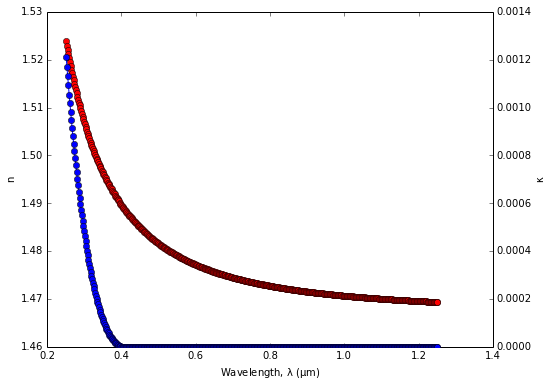

{'COMMENTS': '300-nm monolayer deposited on fused silica using the ion assistance electronic beam deposition technique.',
 'DATA': [{'data': '0.252 1.523846 0.001211\n0.254 1.522945 0.001171\n0.256 1.522066 0.001131\n0.258 1.521208 0.001093\n0.260 1.520370 0.001055\n0.262 1.519552 0.001019\n0.264 1.518753 0.000983\n0.266 1.517972 0.000949\n0.268 1.517209 0.000915\n0.270 1.516463 0.000882\n0.272 1.515734 0.000850\n0.274 1.515021 0.000819\n0.276 1.514325 0.000789\n0.278 1.513643 0.000759\n0.280 1.512977 0.000730\n0.282 1.512325 0.000702\n0.284 1.511687 0.000675\n0.286 1.511063 0.000649\n0.288 1.510452 0.000623\n0.290 1.509854 0.000598\n0.292 1.509268 0.000574\n0.294 1.508695 0.000550\n0.296 1.508134 0.000527\n0.298 1.507584 0.000505\n0.300 1.507046 0.000483\n0.302 1.506518 0.000462\n0.304 1.506002 0.000441\n0.306 1.505495 0.000421\n0.308 1.504999 0.000402\n0.310 1.504512 0.000383\n0.312 1.504035 0.000365\n0.314 1.503568 0.000348\n0.316 1.503109 0.000331\n0.318 1.502660 0.000314\n0.320 1.

In [14]:
c.library.plot(sio2)
c.library.page(sio2)